In [29]:
# Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent 
# over-fitting which may result from simple linear regression.

import matplotlib.pyplot as plt      # import needed packages
import numpy as np 
import pandas as pd
import matplotlib
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
sns.set()

In [13]:
boston=load_boston()     # load boston dataset
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print(boston_df.info())
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
print(boston_df.head(3))
X=boston_df.drop('Price',axis=1)    # independent variables (predictors)
#print(newX[0:3]) # check 
Y=boston_df['Price']                # dependent variable (response)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=10)  # split dataset 

X_test.shape

(152, 13)

In [15]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
ridgeR = Ridge(alpha=0.01)          # higher the alpha value, more restriction on the coefficients,
                                    # lower alpha > more generalization, coefficients are barely restricted 
                                    # and in this case linear and ridge regression resembles
ridgeR.fit(X_train, y_train)        # fit model on training data
ridgeR100 = Ridge(alpha=100)        # comparison with alpha value
ridgeR100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
Ridge_train_score = ridgeR.score(X_train,y_train)
Ridge_test_score = ridgeR.score(X_test, y_test)
Ridge_train_score100 = ridgeR100.score(X_train,y_train)
Ridge_test_score100 = ridgeR100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7495400632086622
linear regression test score: 0.6996255772983115
ridge regression train score low alpha: 0.7495392952061759
ridge regression test score low alpha: 0.6995549781281721
ridge regression train score high alpha: 0.7277579532247355
ridge regression test score high alpha: 0.6519143463571024


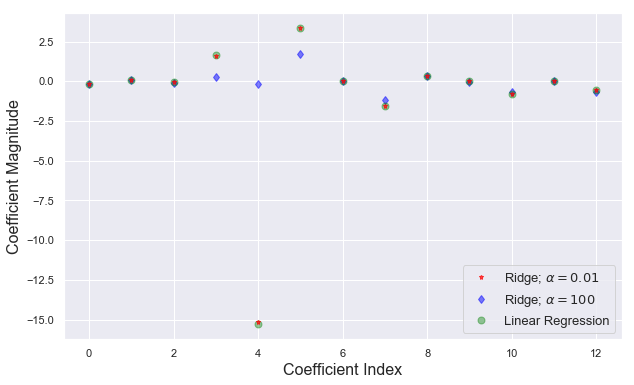

In [27]:
plt.figure(figsize=(10,6))
plt.plot(ridgeR.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(ridgeR100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


In [ ]:
# NOW! LASSO REGRESSION on the same dataset

In [31]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("Lasso training score:", train_score)
print("Lasso test score: ", test_score)
print("Lasso number of features used: ", coeff_used)


Lasso training score: 0.6894154177195142
Lasso test score:  0.5997729850041567
Lasso number of features used:  11


In [38]:
train_score_i=[]
test_score_i=[]
coeff_used_i=[]

for i in [1,0.1,0.01,0.001,0.0001]:
    lasso_i = Lasso(alpha=i, max_iter=10e5) # lasso with alpha = 0.01
    lasso_i.fit(X_train,y_train)
    
    train_score_i.append(lasso_i.score(X_train,y_train))
    test_score_i.append(lasso_i.score(X_test,y_test))
    coeff_used_i.append(np.sum(lasso_i.coef_!=0))


In [46]:
print("Lasso training score:", np.round(train_score_i,3))
print("Lasso test score: ", np.round(test_score_i,3))
print("Lasso number of features used: ", coeff_used_i)

Lasso training score: [0.689 0.738 0.749 0.75  0.75 ]
Lasso test score:  [0.6   0.674 0.697 0.699 0.7  ]
Lasso number of features used:  [11, 11, 13, 13, 13]
